In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms.bipartite import color

In [29]:
dataset = pd.read_csv('D:/Python/Artificial Neural Networks/Self-Organizing Map (SOM)/Data/Credit_Card_Applications.csv')

In [30]:
dataset.tail(20)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
670,15672357,0,37.75,5.500,2,11,4,0.125,1,0,0,1,2,228,1,1
671,15711759,1,22.67,2.540,1,8,8,2.585,1,0,0,0,2,0,1,1
672,15615296,0,17.92,10.210,2,1,1,0.000,0,0,0,0,2,0,51,0
673,15699294,1,24.42,12.335,2,11,8,1.585,1,0,0,1,2,120,1,1
674,15788634,0,25.75,0.500,2,8,8,0.875,1,0,0,1,2,491,1,1
675,15660871,1,26.17,12.500,1,4,8,1.250,0,0,0,1,2,0,18,0
676,15618258,0,22.75,6.165,2,6,4,0.165,0,0,0,0,2,220,1001,0
677,15722535,1,23.00,0.750,2,7,4,0.500,1,0,0,1,1,320,1,0
678,15711977,1,25.67,0.290,1,8,4,1.500,0,0,0,1,2,160,1,0
679,15690169,1,48.58,0.205,1,4,4,0.250,1,1,11,0,2,380,2733,1


In [31]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [32]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [34]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from minisom import MiniSom
som = MiniSom(x = 10 , y = 10 , input_len = 15 , sigma = 1.0 , learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

#find winner

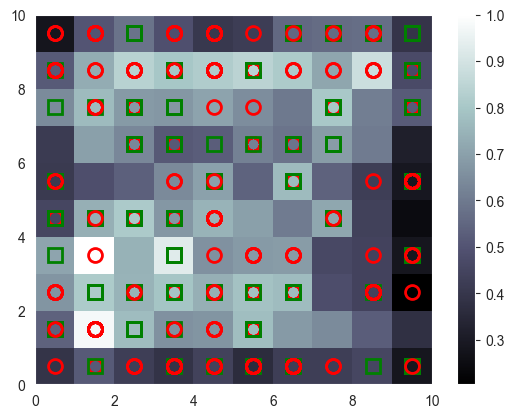

In [36]:
from pylab import bone, pcolor, colorbar, plot, show

# Visualizing the SOM
bone()
pcolor(som.distance_map().T)
colorbar()

# Define markers and colors
markers = ['o', 's']
colors = ['r', 'g']

# Loop through each input data point
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor=colors[y[i]], 
         markerfacecolor='None', 
         markersize=10, 
         markeredgewidth=2)

show()
